In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# import the citipy module.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities=[]
#Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

627

In [8]:
# Import the requests library.
import requests

#Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for weather map API call.
url="http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
#Import the datetime module from the datetime library.
from datetime import datetime

In [11]:
#Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if(i % 50 ==0 and i>=50):
        set_count += 1
        record_count = 1
        
    #Create endpoint url for each city.
    city_url = url + "&q=" + city
        
    #log the url,record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
        
    #Add 1 to the record count.
    record_count += 1
        
    #Run an API request for each of the cities.
    try:
         #Parse the JSON and retrieve the data.
        city_weather = requests.get(city_url).json()
        #Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
            
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
            
        #Append the city information into city_data list.
        city_data.append({"City": city.title(),
                             "Lat": city_lat,
                             "Lng": city_lng,
                             "Max Temp": city_max_temp,
                             "Humidity": city_humidity,
                             "Cloudiness": city_clouds,
                             "Wind Speed": city_wind,
                             "Country": city_country,
                             "Date": city_date})
    #If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
#Indicate the data loading is complete.
print("------------------------------")
print("Data Retrieval Complete       ")
print("------------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | phan thiet
Processing Record 2 of Set 1 | fare
Processing Record 3 of Set 1 | atuona
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | bontang
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | singaraja
Processing Record 8 of Set 1 | kenora
Processing Record 9 of Set 1 | hokitika
Processing Record 10 of Set 1 | farah
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | gilgit
Processing Record 13 of Set 1 | teahupoo
Processing Record 14 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 15 of Set 1 | abonnema
Processing Record 16 of Set 1 | richards bay
Processing Record 17 of Set 1 | khatanga
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | luis correia
Processing Record 20 of Set 1 | namibe
Processing Record 21 of Set 1 | cabo san lucas
Processing Record 22 of Set 1 | ushuaia
Processing Record 23

Processing Record 41 of Set 4 | buraydah
Processing Record 42 of Set 4 | tasiilaq
Processing Record 43 of Set 4 | fortuna foothills
Processing Record 44 of Set 4 | ende
Processing Record 45 of Set 4 | san vicente
Processing Record 46 of Set 4 | laguna
Processing Record 47 of Set 4 | shimoda
Processing Record 48 of Set 4 | chuy
Processing Record 49 of Set 4 | vitim
Processing Record 50 of Set 4 | alta floresta
Processing Record 1 of Set 5 | karaman
Processing Record 2 of Set 5 | saint-pierre
Processing Record 3 of Set 5 | la ronge
Processing Record 4 of Set 5 | hirara
Processing Record 5 of Set 5 | rio claro
Processing Record 6 of Set 5 | savannah bight
Processing Record 7 of Set 5 | roanoke rapids
Processing Record 8 of Set 5 | aljezur
Processing Record 9 of Set 5 | kovdor
Processing Record 10 of Set 5 | esperance
Processing Record 11 of Set 5 | salalah
Processing Record 12 of Set 5 | longyearbyen
Processing Record 13 of Set 5 | basoko
Processing Record 14 of Set 5 | staryy nadym
Proce

Processing Record 28 of Set 8 | college
Processing Record 29 of Set 8 | kyaka
Processing Record 30 of Set 8 | yialos
City not found. Skipping...
Processing Record 31 of Set 8 | olinda
Processing Record 32 of Set 8 | uusikaupunki
Processing Record 33 of Set 8 | saquarema
Processing Record 34 of Set 8 | placido de castro
Processing Record 35 of Set 8 | lucea
Processing Record 36 of Set 8 | pipri
Processing Record 37 of Set 8 | east london
Processing Record 38 of Set 8 | port-de-paix
City not found. Skipping...
Processing Record 39 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 40 of Set 8 | codrington
Processing Record 41 of Set 8 | muktagachha
City not found. Skipping...
Processing Record 42 of Set 8 | bokspits
City not found. Skipping...
Processing Record 43 of Set 8 | porbandar
Processing Record 44 of Set 8 | manaus
Processing Record 45 of Set 8 | zhigansk
Processing Record 46 of Set 8 | saleaula
City not found. Skipping...
Processing Record 47 of Set 8 | krasnos

Processing Record 12 of Set 12 | yulara
Processing Record 13 of Set 12 | padang
Processing Record 14 of Set 12 | muyezerskiy
Processing Record 15 of Set 12 | braunau
Processing Record 16 of Set 12 | san quintin
Processing Record 17 of Set 12 | kazalinsk
City not found. Skipping...
Processing Record 18 of Set 12 | sao filipe
Processing Record 19 of Set 12 | bitung
Processing Record 20 of Set 12 | aktau
Processing Record 21 of Set 12 | alice springs
Processing Record 22 of Set 12 | jaisinghnagar
Processing Record 23 of Set 12 | ashland
Processing Record 24 of Set 12 | poya
Processing Record 25 of Set 12 | turtkul
City not found. Skipping...
Processing Record 26 of Set 12 | jining
Processing Record 27 of Set 12 | leningradskiy
Processing Record 28 of Set 12 | wichita falls
Processing Record 29 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 30 of Set 12 | nouadhibou
Processing Record 31 of Set 12 | koungou
Processing Record 32 of Set 12 | tarko-sale
Processing Reco

In [15]:
len(city_data)

573

In [17]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Phan Thiet,10.9333,108.1000,78.39,85,100,11.50,VN,2021-07-29 21:52:35
1,Fare,-16.7000,-151.0167,78.04,75,53,8.21,PF,2021-07-29 21:52:35
2,Atuona,-9.8000,-139.0333,77.27,78,17,13.96,PF,2021-07-29 21:52:36
3,Albany,42.6001,-73.9662,71.31,85,100,5.61,US,2021-07-29 21:52:36
4,Bontang,0.1333,117.5000,76.51,92,78,5.95,ID,2021-07-29 21:52:36
5,Rikitea,-23.1203,-134.9692,71.85,77,35,7.94,PF,2021-07-29 21:50:09
6,Singaraja,-8.1120,115.0882,77.00,79,94,4.52,ID,2021-07-29 21:52:37
7,Kenora,49.8167,-94.4337,74.59,28,20,9.22,CA,2021-07-29 21:52:37
8,Hokitika,-42.7167,170.9667,54.03,79,95,6.87,NZ,2021-07-29 21:52:37
9,Farah,32.5000,62.5000,84.81,12,0,6.62,AF,2021-07-29 21:52:37


In [18]:
#Rearange Column Order
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Phan Thiet,VN,2021-07-29 21:52:35,10.9333,108.1000,78.39,85,100,11.50
1,Fare,PF,2021-07-29 21:52:35,-16.7000,-151.0167,78.04,75,53,8.21
2,Atuona,PF,2021-07-29 21:52:36,-9.8000,-139.0333,77.27,78,17,13.96
3,Albany,US,2021-07-29 21:52:36,42.6001,-73.9662,71.31,85,100,5.61
4,Bontang,ID,2021-07-29 21:52:36,0.1333,117.5000,76.51,92,78,5.95
5,Rikitea,PF,2021-07-29 21:50:09,-23.1203,-134.9692,71.85,77,35,7.94
6,Singaraja,ID,2021-07-29 21:52:37,-8.1120,115.0882,77.00,79,94,4.52
7,Kenora,CA,2021-07-29 21:52:37,49.8167,-94.4337,74.59,28,20,9.22
8,Hokitika,NZ,2021-07-29 21:52:37,-42.7167,170.9667,54.03,79,95,6.87
9,Farah,AF,2021-07-29 21:52:37,32.5000,62.5000,84.81,12,0,6.62


In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [22]:
#Import the time module.
import time

# Get today's date.
today = time.strftime("%x")
today

'07/29/21'

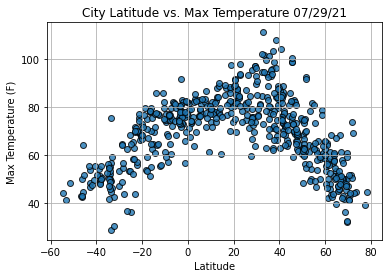

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

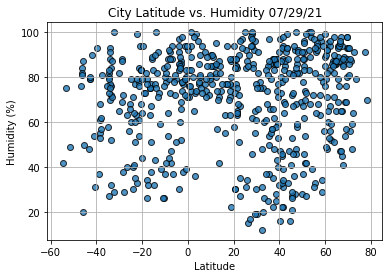

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

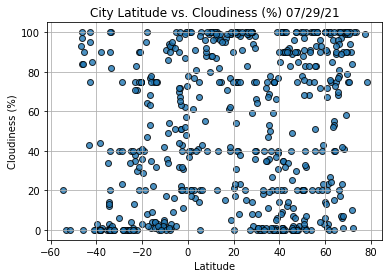

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

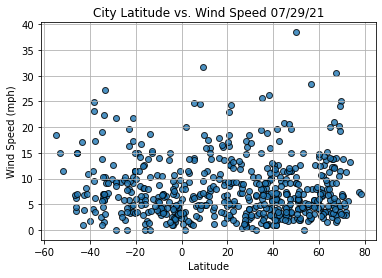

In [26]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()